<a href="https://colab.research.google.com/github/ElisaCSouza23/ElisaCSouza23/blob/main/Data_visualizacion_Seaborn_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando base de dados**

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('tips_atualizado.csv')

In [ ]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# **Tradução**

In [ ]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
renomear = {'total_bill': 'valor_da_conta', 
            'tip': 'gorjeta',
            'dessert': 'sobremesa',
            'day': 'dia_da_semana',
            'time': "hora_do_dia",
            'size': "total_de_pessoas"}

In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
gorjetas = dados.rename(columns = renomear)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
sim_nao = { 'No':'não',
           'Yes': 'sim'}

In [ ]:
gorjetas.sobremesa.map(sim_nao)

0       não
1       não
2       não
3       não
4       não
       ... 
3411    não
3412    sim
3413    sim
3414    não
3415    não
Name: sobremesa, Length: 3416, dtype: object

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [ ]:
gorjetas.sobremesa.head(1)

0    não
Name: sobremesa, dtype: object

In [ ]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [ ]:
gorjetas.dia_da_semana.head(1)

0    Domingo
Name: dia_da_semana, dtype: object

In [ ]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [ ]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [ ]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [ ]:
gorjetas.hora_do_dia.head(1)

0    Jantar
Name: hora_do_dia, dtype: object

In [ ]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

# **Importando o Seaborn**



In [ ]:
import seaborn as sns

In [ ]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.8/dist-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: missingno


# **Análise 1 - Valor da conta e gorjeta**





<AxesSubplot:xlabel='valor_da_conta', ylabel='gorjeta'>

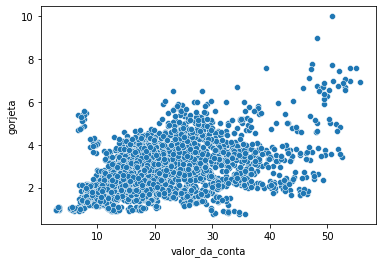

In [ ]:
sns.scatterplot(x= 'valor_da_conta', y= 'gorjeta', data=gorjetas)

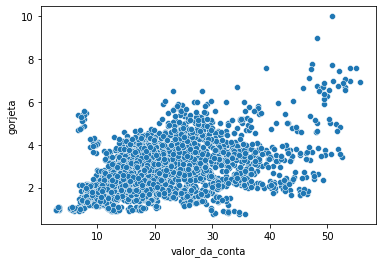

In [ ]:
valor_gorjeta = sns.scatterplot(x= 'valor_da_conta', y= 'gorjeta', data=gorjetas)

#### **Visualmente, o valor da gorjeta aumenta quando o valor da conta aumenta**

In [ ]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 3416 registros 

Registros não nulos


valor_da_conta      3416
gorjeta             3416
sobremesa           3416
dia_da_semana       3416
hora_do_dia         3416
total_de_pessoas    3416
dtype: int64

## **Criando o campo porcentagem**

In [ ]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [ ]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,não,Domingo,Jantar,2,0.06
1,10.34,1.66,não,Domingo,Jantar,3,0.16
2,21.01,3.50,não,Domingo,Jantar,3,0.17
3,23.68,3.31,não,Domingo,Jantar,2,0.14
4,24.59,3.61,não,Domingo,Jantar,4,0.15


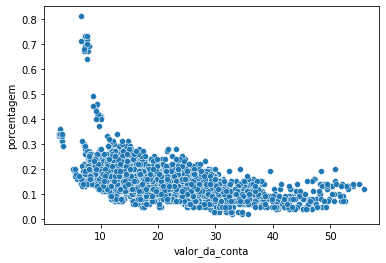

In [ ]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

### **Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

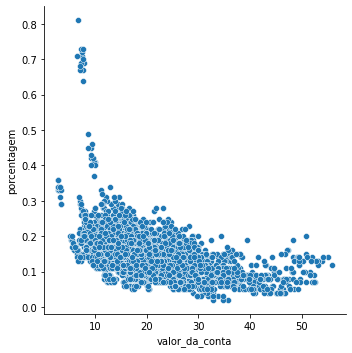

In [ ]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

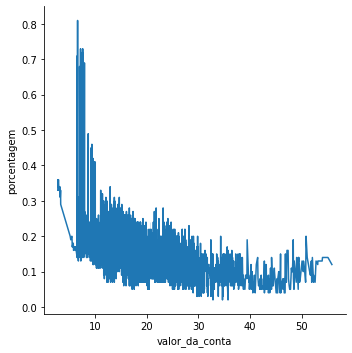

In [ ]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

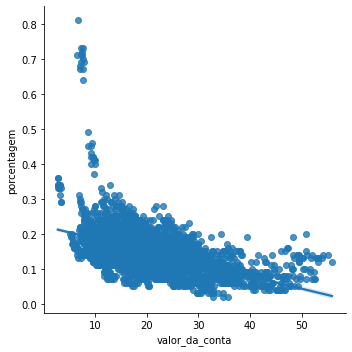

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

### **Visualmente, a distribuição apresenta poucas diferenças**

# **Análise 2 - Sobremesa**

In [ ]:
gorjetas[gorjetas.sobremesa == 'sim']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
56,38.010000,3.000000,sim,Sábado,Jantar,4,0.08
58,11.240000,1.760000,sim,Sábado,Jantar,2,0.16
60,20.290000,3.210000,sim,Sábado,Jantar,2,0.16
61,13.810000,2.000000,sim,Sábado,Jantar,2,0.14
62,11.020000,1.980000,sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
3406,16.882586,2.967175,sim,Sábado,Jantar,2,0.18
3408,11.840990,1.044625,sim,Sábado,Jantar,2,0.09
3409,34.704251,0.882144,sim,Sábado,Jantar,2,0.03
3412,25.531567,1.604021,sim,Sábado,Jantar,2,0.06


In [ ]:
gorjetas[gorjetas.sobremesa == 'sim'].describe()


,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


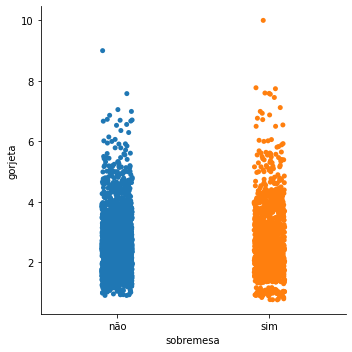

In [ ]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

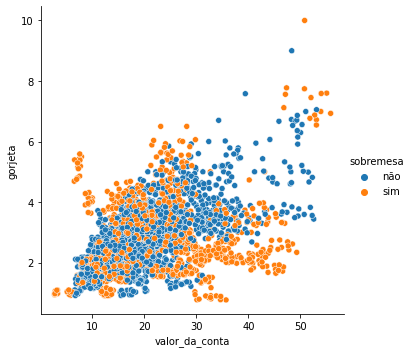

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

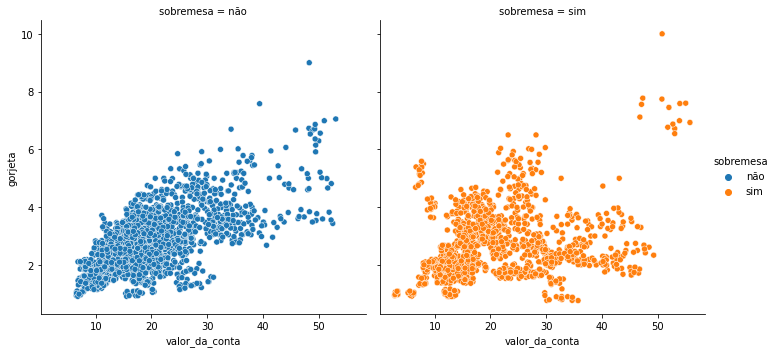

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

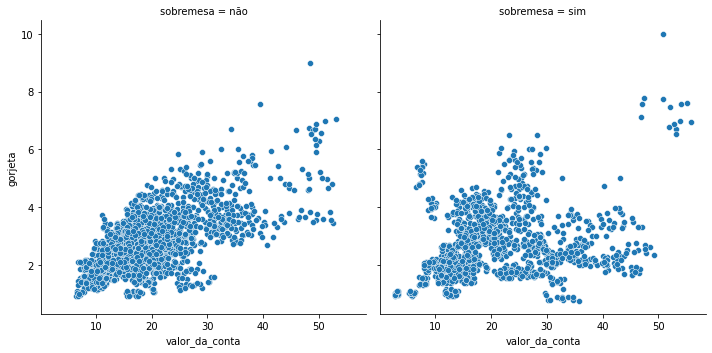

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas)

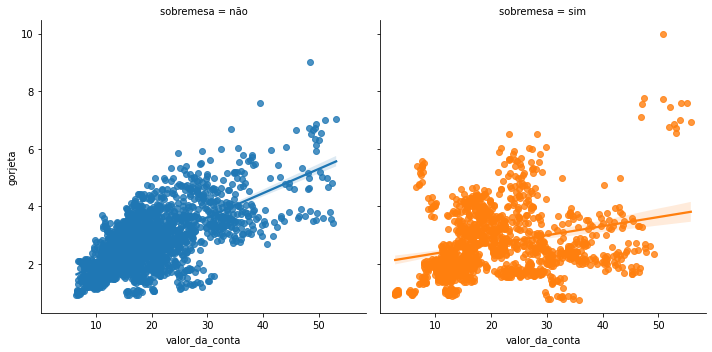

In [ ]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

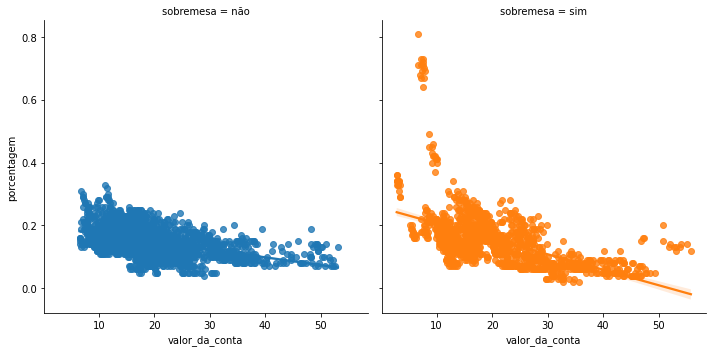

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

### **Visualmente, existe uma diferença entre aqueles que pediram sobremesa e aqueles que não pediram**

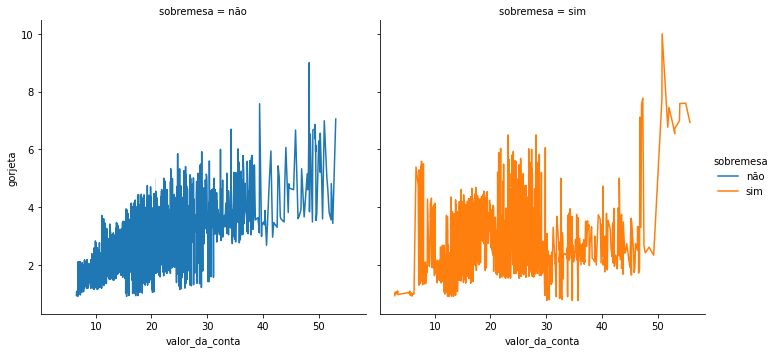

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

# **Teste de hipótese**

**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**


**H<sup>alt</sup>**
>**A distribuição da taxa da gorjeta NÃO é a mesma nos dois grupos**

In [ ]:
from scipy.stats import ranksums

In [ ]:
gorjetas.query("sobremesa == 'sim'").porcentagem

56      0.08
58      0.16
60      0.16
61      0.14
62      0.18
        ... 
3406    0.18
3408    0.09
3409    0.03
3412    0.06
3413    0.08
Name: porcentagem, Length: 1302, dtype: float64

In [ ]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [ ]:
sobremesa = gorjetas.query("sobremesa == 'sim'").porcentagem
sem_sobremesa = gorjetas.query("sobremesa == 'não'").porcentagem

In [ ]:
ranksums(sobremesa, sem_sobremesa)

RanksumsResult(statistic=-2.130334422180308, pvalue=0.033144013617673405)

In [ ]:
r = ranksums(sobremesa, sem_sobremesa)
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.033144013617673405


**A distribuição da taxa da gorjeta é a mesma nos dois grupos**


# **Análise 3 - Dia da semana**

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,não,Domingo,Jantar,2,0.06
1,10.34,1.66,não,Domingo,Jantar,3,0.16
2,21.01,3.50,não,Domingo,Jantar,3,0.17
3,23.68,3.31,não,Domingo,Jantar,2,0.14
4,24.59,3.61,não,Domingo,Jantar,4,0.15


In [ ]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

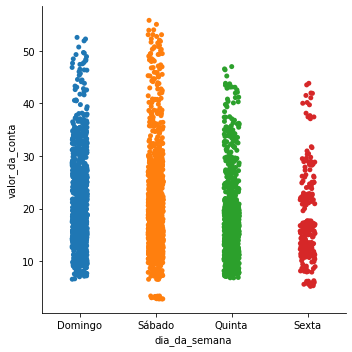

In [ ]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

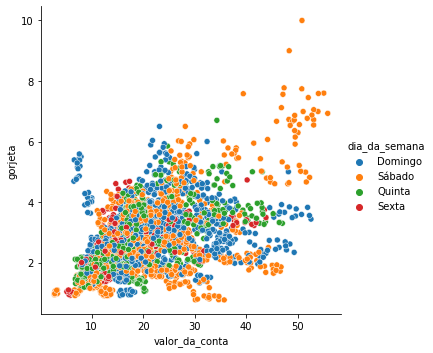

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

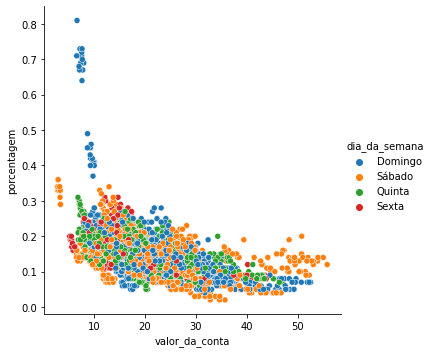

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

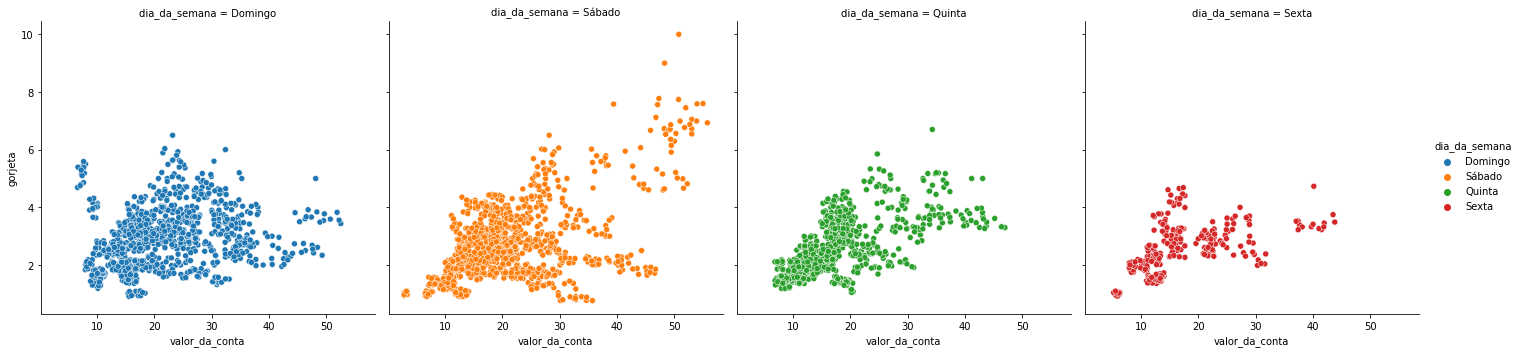

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

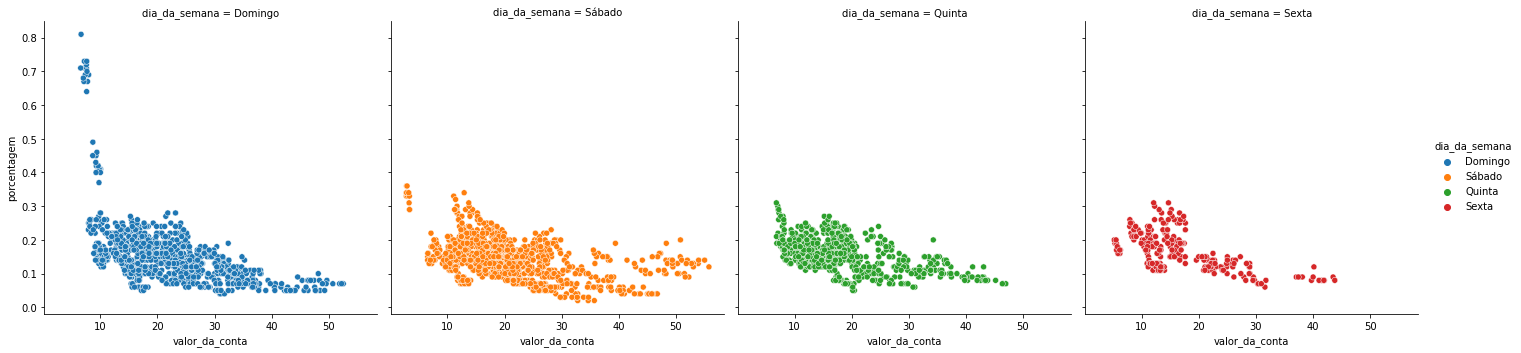

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

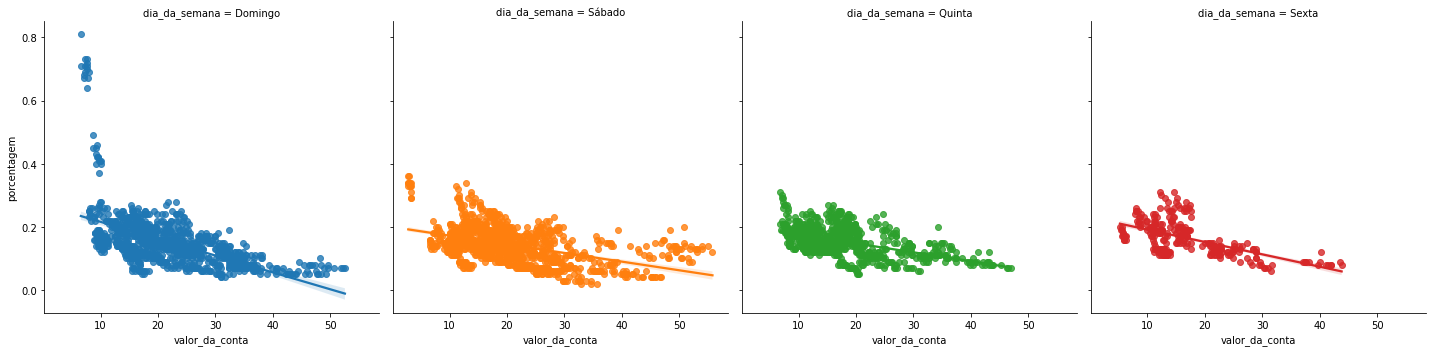

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [ ]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [ ]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.711189214091612


In [ ]:
gorjetas.groupby(['dia_da_semana']).mean()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Domingo,21.439133,2.902079,2.842105,0.154953
Quinta,17.724088,2.556177,2.451613,0.154090
Sexta,17.215616,2.549960,2.105263,0.163158
Sábado,20.480249,2.690114,2.517241,0.143604


In [ ]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.439133,2.902079,0.154953
Quinta,17.724088,2.556177,0.154090
Sexta,17.215616,2.549960,0.163158
Sábado,20.480249,2.690114,0.143604


In [ ]:
gorjetas.dia_da_semana.value_counts()

Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64

In [ ]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64

# **Teste de Hipótese**



**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo**


**H<sup>alt</sup>**
>**A distribuição do valor da conta NÃO é igual no sábado e no domingo**

In [ ]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [ ]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [ ]:
ranksums(valor_conta_domingo, valor_conta_sabado)

RanksumsResult(statistic=3.512690684754087, pvalue=0.0004435935681441821)

#### Devemos aceitar a hipótese nula quando o p-value for menor ou igual a 0.05, no caso, p-value = 1, sendo assim, rejeitamos a hipótese nula, concluindo que a **A distribuição do valor da conta NÃO é igual no sábado e no domingo**

# **Análise 4 - Hora do dia**

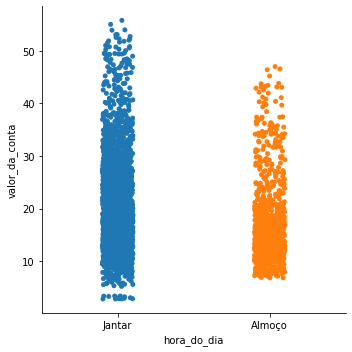

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

#### O catplot plota um gráfico **categórico**

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


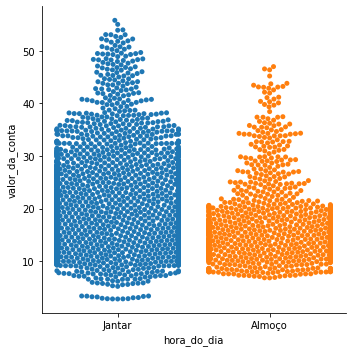

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

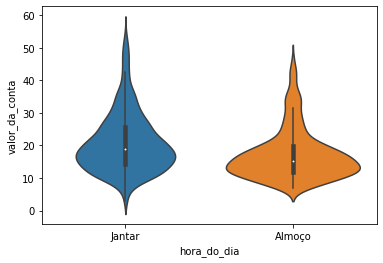

In [ ]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

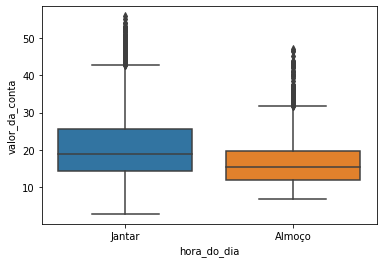

In [ ]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [ ]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

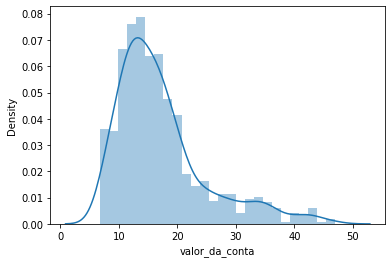

In [ ]:
sns.distplot(almoco)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta'>

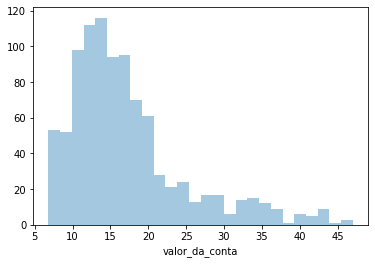

In [ ]:
sns.distplot(almoco, kde=False)

In [ ]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

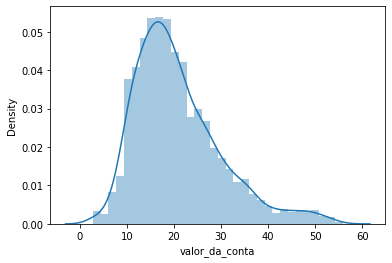

In [ ]:
sns.distplot(jantar)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta'>

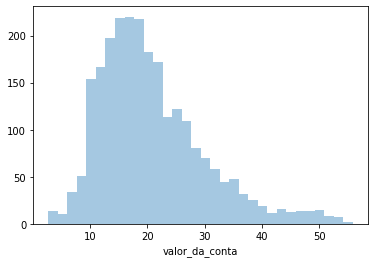

In [ ]:
sns.distplot(jantar, kde=False)

In [ ]:
gorjetas.groupby(['hora_do_dia']).mean()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
hora_do_dia,,,,
Almoço,17.213913,2.534495,2.411765,0.157668
Jantar,20.832954,2.779458,2.630682,0.148876


In [ ]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.213913,2.534495,0.157668
Jantar,20.832954,2.779458,0.148876


# **Teste de Hipótese 2**

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no jantar e no almoço**


**H<sup>alt</sup>**
>**A distribuição do valor da conta NÃO é igual no jantar e no almoço**

In [ ]:
r2 = ranksums(jantar, almoco)

In [ ]:
print('O valor do p-value é de {}'.format(r2.pvalue))

O valor do p-value é de 5.169201062207143e-34


In [ ]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [ ]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [ ]:
ranksums(porcentagem_almoco, porcentagem_jantar)

RanksumsResult(statistic=6.760141268743677, pvalue=1.3785725618355523e-11)

In [ ]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 1.3785725618355523e-11


p-value é de 0.2602493995587126 > 0.05, logo, ACEITAMOS a hipótese nula.
A distribuição do valor da conta é igual no jantar e no almoço.

Lembrando que
**p_valor <= 0.05** --- **REJEITA** a hipótese nula
**p_valor > 0.05** --- **ACEITA** a hipótese nula